In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# Changing the fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Load the data
df = pd.read_csv("dropout.csv", delimiter=";")
df = df[df["Target"] != "Enrolled"]

# Check for missing values
missing_values = df.isnull().sum()

# Separate target from predictors
X = df.drop("Target", axis=1)
y = df["Target"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical variables
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = np.abs(model.coef_).flatten()

# Pair the feature names with their importance values
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort the features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

/var/folders/fk/wn0vj4k50k33fb_2bzd98b8c0000gn/T/ipykernel_2398/40911804.py:10: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/ben.nguyen/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


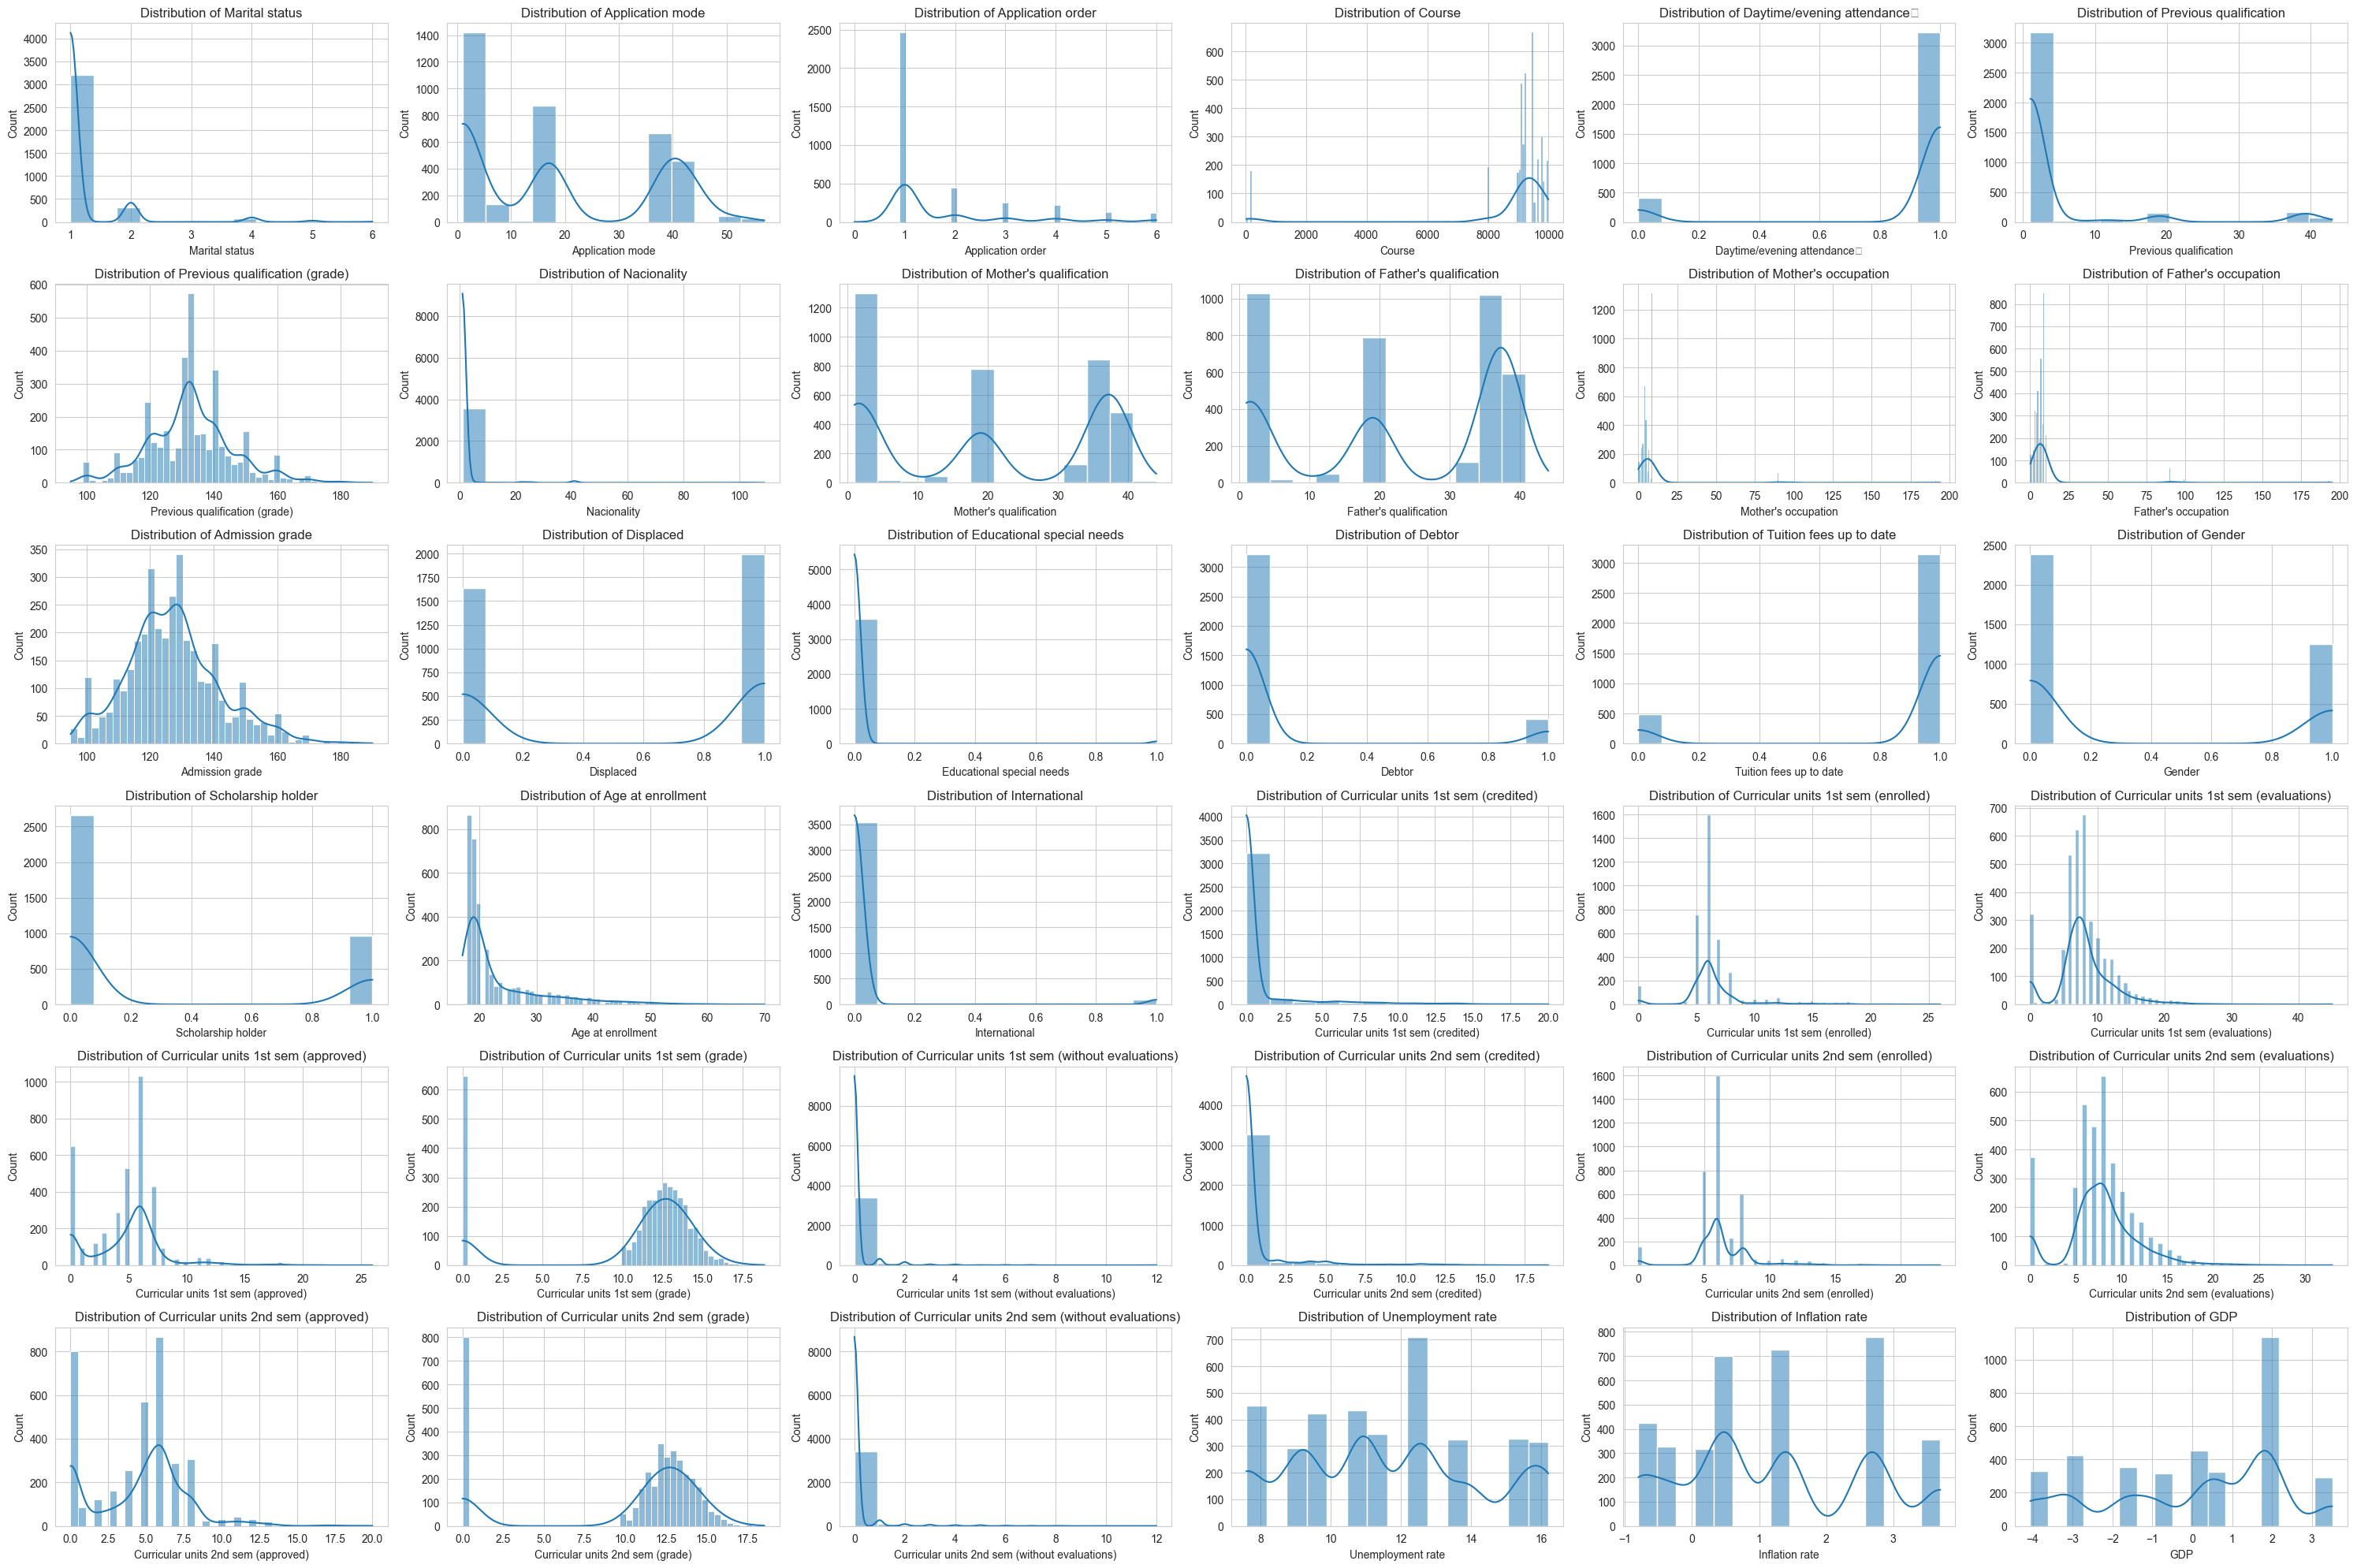

In [3]:
# Visualization
plt.figure(figsize=(30, 20))
sns.set_style("whitegrid")

# Plotting histograms for the numerical columns
for index, column in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, index)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

plt.show()

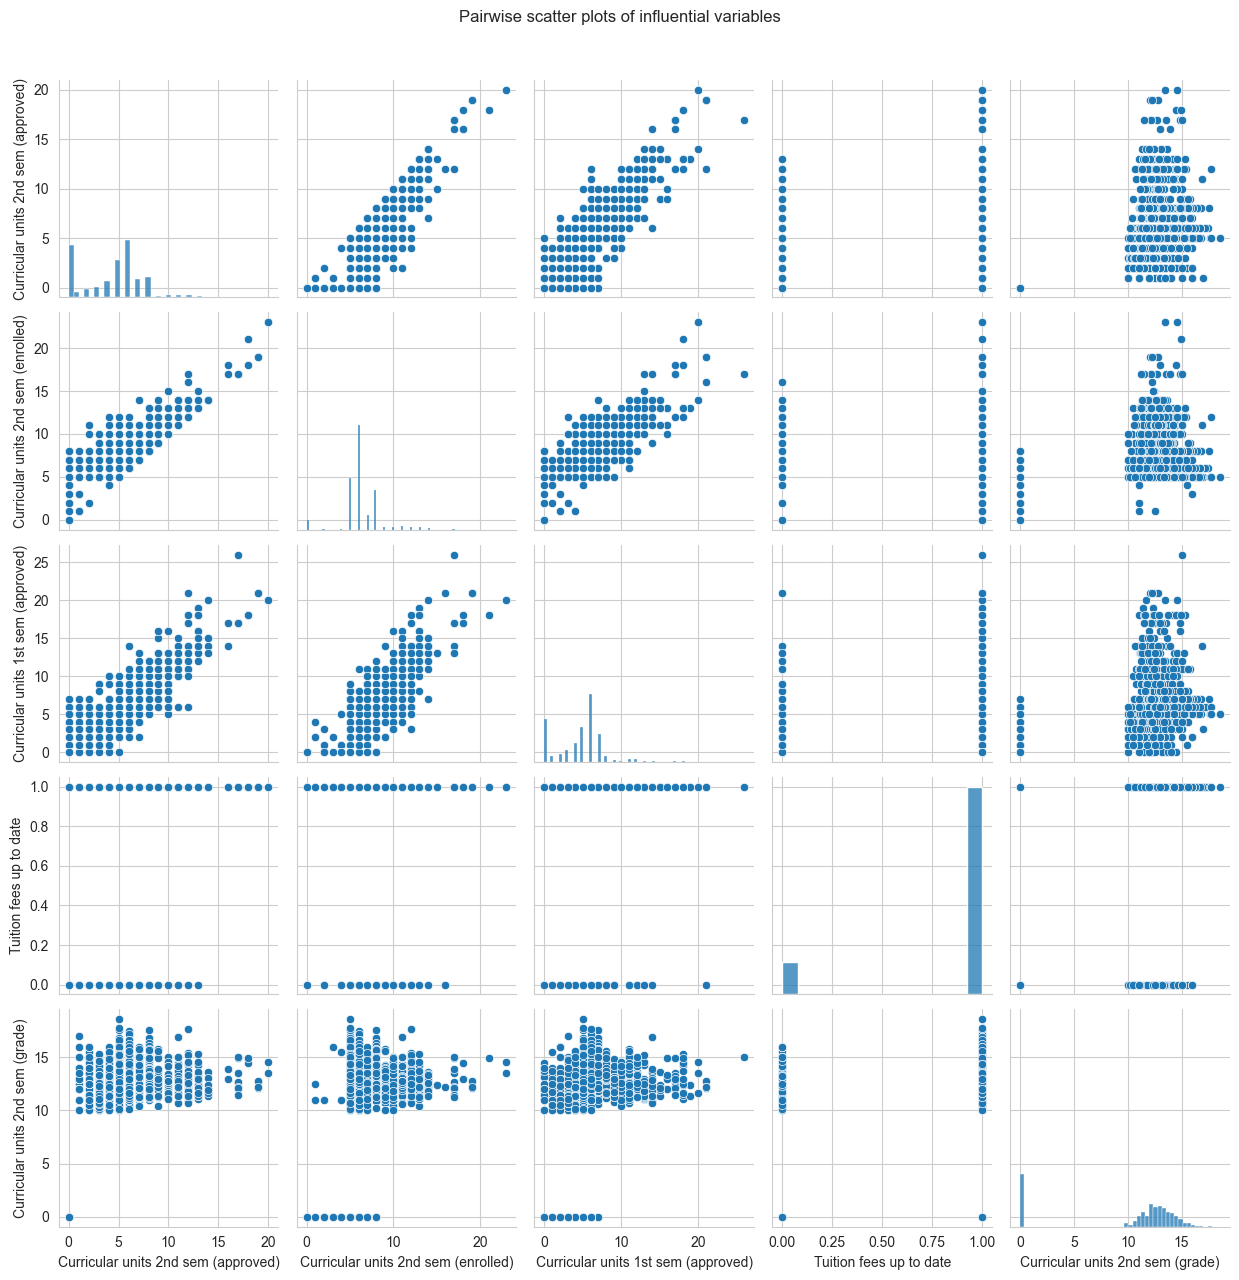

In [4]:
# Selected influential variables for visualization
selected_vars = [
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 1st sem (approved)',
    'Tuition fees up to date',
    'Curricular units 2nd sem (grade)'
]


# Plotting pairwise scatter plots
sns.pairplot(df[selected_vars])
plt.suptitle("Pairwise scatter plots of influential variables", y=1.02)
plt.tight_layout()
plt.show()

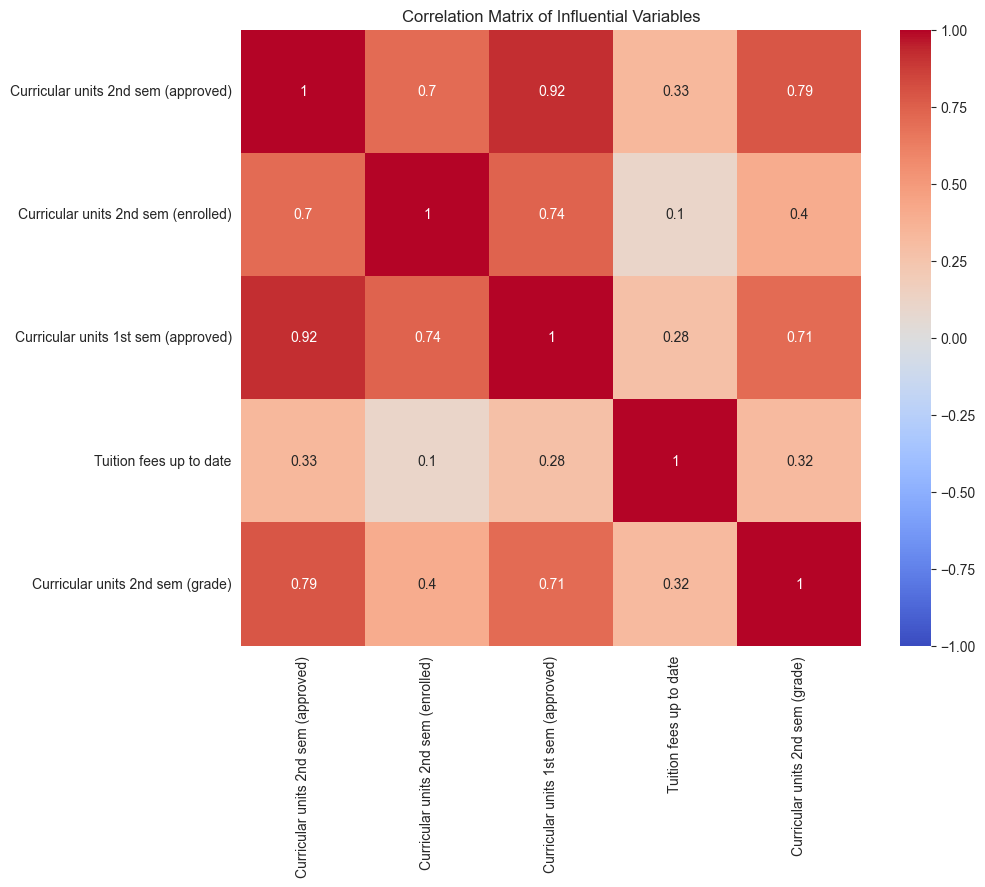

In [5]:
# Generating a correlation matrix for the selected variables
correlation_matrix = df[selected_vars].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Influential Variables")
plt.show()
